# To Do

* Sample statistics
* tables
* 

For next time:
* density catalog
* review text
* tables for spines (GL)
* master table

* calculate local density using sdss spec sample

In [1]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import ks_2samp
%matplotlib notebook
import time
import glob
# importing mplot3d toolkits, numpy and matplotlib 
from mpl_toolkits import mplot3d 

from astropy.coordinates import SkyCoord

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('/home/rfinn/github/Virgo/programs/')
import virgoCommon

Running on Rose's computer


In [3]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'
plotdir = '/home/rfinn/research/Virgo/plots/'
%run ~/github/Virgo/programs/readtables.py

In [9]:
v.env.colnames

['DM',
 'VFID_1',
 'prefix',
 'radius',
 'objname',
 'Vcosmic',
 'M_r',
 'DEC',
 'radius_flag',
 'SGY',
 'SGX',
 'SGZ',
 'NSAID',
 'NEDname',
 'Dmedian',
 'nCI08',
 'RA',
 'Virgo_infall',
 'Steerflag',
 'HAflag',
 'distSGY_Virgo',
 'Vmodel',
 'distSGZ_Virgo',
 'HAobsflag',
 'V_LG',
 'FLUX_R',
 'OBJID',
 'mag_r',
 'nCI08_err',
 'n5th_2D',
 'name',
 'n5th_2D_err',
 'vr',
 'dr9_cat',
 'n5th',
 'distSGX_Virgo',
 'n5th_err',
 'VFID_2',
 'flag_clus',
 'flag_gr',
 'flag_fil',
 'flag_pf']

In [5]:
v.main

<Table length=6797>
  VFID           RA         ...               prefix                name  
                            ...                                           
 bytes8       float64       ...              bytes36               bytes8 
-------- ------------------ ... --------------------------------- --------
VFID0000 185.86877249999998 ...                  VFID0000-NGC4363 VFID0000
VFID0001            182.208 ...                  VFID0001-NGC4133 VFID0001
VFID0002         145.944663 ...                  VFID0002-NGC2977 VFID0002
VFID0003        185.5730835 ...              VFID0003-CGCG352-030 VFID0003
VFID0004 182.82775049999998 ...                 VFID0004-UGC07189 VFID0004
VFID0005        173.1341835 ...                  VFID0005-NGC3752 VFID0005
VFID0006         121.912404 ...                 VFID0006-UGC04202 VFID0006
VFID0007           118.2363 ...              VFID0007-KUG0746+747 VFID0007
VFID0008         274.943166 ...                  VFID0008-NGC6643 VFID0008
     ...                ... ...                               ...      ...
VFID6787 190.73862749999998 ...                 VFID6787-UGC07883 VFID6787
VFID6788         215.627868 ... VFID6788-WISEAJ142230.70-011345.2 VFID6788
VFID6789          163.18935 ... VFID6789-WISEAJ105245.44-011353.0 VFID6789
VFID6790 191.58748649999998 ... VFID6790-WISEAJ124620.96-011500.3 VFID6790
VFID6791 186.59453249999999 ...                    VFID6791-UM501 VFID6791
VFID6792        175.9398405 ...               VFID6792-GAMA143446 VFID6792
VFID6793           170.0766 ... VFID6793-WISEAJ112018.30-011650.6 VFID6793
VFID6794        183.4117005 ... VFID6794-WISEAJ121338.81-011736.9 VFID6794
VFID6795         187.442571 ... VFID6795-WISEAJ122946.30-011741.6 VFID6795
VFID6796        180.2962065 ...                 VFID6796-UGC07000 VFID6796

# HI Deficiency #


In [50]:
v.a100.colnames

['VFID',
 'RA',
 'DEC',
 'NEDname',
 'modz',
 'e_modz',
 'mod0',
 'e_mod0',
 'vmaxg',
 'e_vmaxg',
 'vmaxs',
 'e_vmaxs',
 'vdis',
 'e_vdis',
 'Separation',
 'AGC',
 'Name',
 'OrigSrcName',
 'HISrcName',
 'RAdeg_HI',
 'DECdeg_HI',
 'RAdeg_OC',
 'DECdeg_OC',
 'RAdeg_Use',
 'DECdeg_Use',
 'Vhelio',
 'sigV',
 'W50',
 'sigWtot',
 'HIdef',
 'HIdef_flag',
 'HIdef_bos',
 'HIdef_jon',
 'HIdef_bytype']

### Toribio vs Jones

Toribio shows more HI def whereas center
of Jones distribution is closer to zero.
need to look at Jones paper to see what's going on

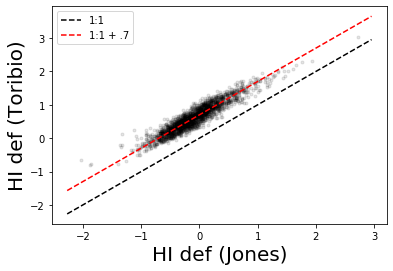

In [5]:
# compare different estimates
flag = v.a100['HIdef_flag']
plt.figure()
plt.plot(v.a100['HIdef_jon'][flag],v.a100['HIdef'][flag],'k.',alpha=.1)
plt.ylabel('HI def (Toribio)',fontsize=20)
plt.xlabel('HI def (Jones)',fontsize=20)
xmin,xmax = plt.xlim()
xl = np.linspace(xmin,xmax, 100)
plt.plot(xl,xl,'k--',label='1:1')
plt.plot(xl,xl+.7,'r--',label='1:1 + .7')
plt.legend()

# Variations with Morphology

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


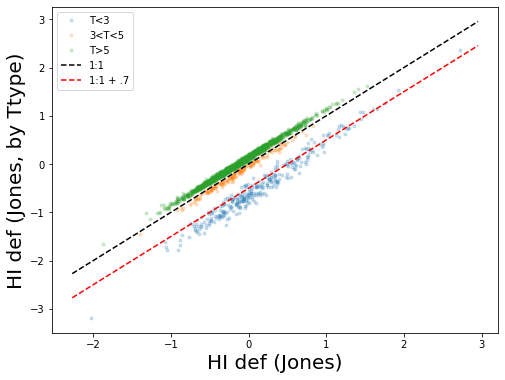

In [7]:
# compare different estimates
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
baseflag = v.a100['HIdef_flag'] &(~np.isnan(v.hl['t']))
flag1 = baseflag & (v.hl['t'] < 3)
flag2 = baseflag & (v.hl['t'] >= 3)& (v.hl['t'] <= 5)
flag3 = baseflag & (v.hl['t'] > 5)
flags = [flag1,flag2,flag3]
labels= ['T<3','3<T<5','T>5']
plt.figure(figsize=(8,6))
for i,f in enumerate(flags):
    plt.plot(v.a100['HIdef_jon'][f],v.a100['HIdef_bytype'][f],'k.',c=mycolors[i],alpha=.2,label=labels[i])
plt.ylabel('HI def (Jones, by Ttype)',fontsize=20)
plt.xlabel('HI def (Jones)',fontsize=20)
xmin,xmax = plt.xlim()
xl = np.linspace(xmin,xmax, 100)
plt.plot(xl,xl,'k--',label='1:1')
plt.plot(xl,xl-.5,'r--',label='1:1 + .7')
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


comparing env=0 and 1
Ks_2sampResult(statistic=0.1938530480186615, pvalue=1.875499755499277e-12)
comparing env=0 and 2
Ks_2sampResult(statistic=0.06466281130491558, pvalue=0.6936650412499374)
comparing env=1 and 2
Ks_2sampResult(statistic=0.23863025481131062, pvalue=1.210947290997133e-06)


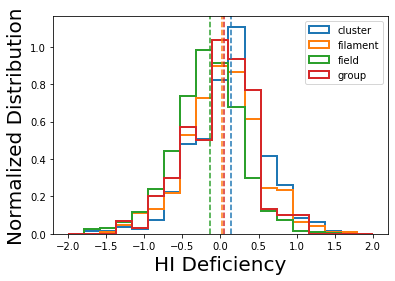

In [8]:
## need to update this to use Benedetta's new flags
plt.figure()
baseflag = v.a100['HIdef_flag'] &(~np.isnan(v.hl['t'])) & (~np.isnan(v.a100['HIdef_bytype']))
flag0 = baseflag & (v.env['flag_clus'] == 1)
flag1 = baseflag & (v.env['flag_fil'] == 1)
flag2 = baseflag & (v.env['flag_fie'] == 1)
flag3 = baseflag & (v.env['flag_gro'] == 1)
flags = [flag0,flag1,flag2,flag3]
#labels= ['1','2','3']
labels= ['cluster','filament','field','group']
mybins = np.linspace(-2,2,20)
for i,f in enumerate(flags):
    var = v.a100['HIdef_bytype'][f]
    t=plt.hist(var,color=mycolors[i],label=labels[i],histtype='step',bins=mybins,lw=2,normed=True)
    #print(np.median(var))
    plt.axvline(x=np.median(var),color=mycolors[i],ls='--')
plt.legend()
plt.xlabel('HI Deficiency',fontsize=20)
plt.ylabel('Normalized Distribution',fontsize=20)

# compare distributions with KS test
print('comparing env=0 and 1')
print(ks_2samp(v.a100['HIdef_bytype'][flag1],v.a100['HIdef_bytype'][flag2]))
print('comparing env=0 and 2')
print(ks_2samp(v.a100['HIdef_bytype'][flag1],v.a100['HIdef_bytype'][flag3]))
print('comparing env=1 and 2')
print(ks_2samp(v.a100['HIdef_bytype'][flag2],v.a100['HIdef_bytype'][flag3]))

* look at galaxies at fixed stellar mass cut
* look at local density
* look at spatial distribution - only have HI for region of ALFALFA

# Catalog Statistics #

In [57]:
def printstats(flag,name):
    print(name+' stats')
    print('number = {:4d}/{:4d} ({:.3f})'.format(sum(flag),len(flag),sum(flag)/len(flag)))

In [58]:
print('total number of galaxies in the catalog = ',len(v.main))
print('number with HL data = ',sum(v.main['HLflag']))
print('fraction with HL data = %.3f '%(sum(v.main['HLflag'])/len(v.main)))

total number of galaxies in the catalog =  6797
number with HL data =  6636
fraction with HL data = 0.976 


In [59]:
flags = ['HLflag','NSAflag','NSAV0flag','A100flag','COflag','HAflag','HAobsflag','Steerflag','Z0MGSflag','unwiseflag']
for f in flags:
    printstats(v.main[f],f)

HLflag stats
number = 6636/6797 (0.976)
NSAflag stats
number = 5284/6797 (0.777)
NSAV0flag stats
number = 5248/6797 (0.772)
A100flag stats
number = 2336/6797 (0.344)
COflag stats
number =  242/6797 (0.036)
HAflag stats
number =  150/6797 (0.022)
HAobsflag stats
number =  331/6797 (0.049)
Steerflag stats
number = 1959/6797 (0.288)
Z0MGSflag stats
number = 2375/6797 (0.349)
unwiseflag stats
number = 6126/6797 (0.901)


# Sample Overview

<IPython.core.display.Javascript object>


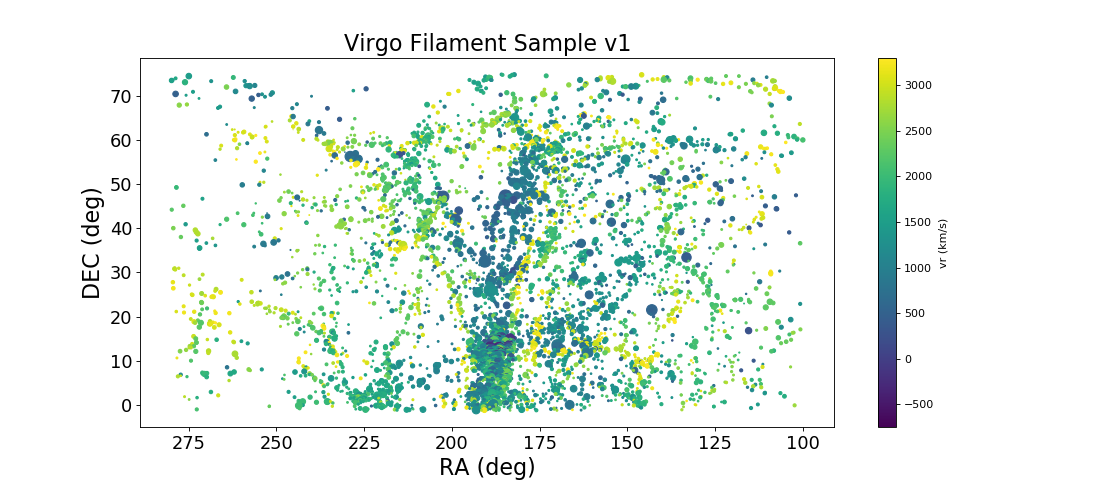

Text(0.5, 1.0, 'Virgo Filament Sample v1')

In [60]:
plt.figure(figsize=(14,6))
plt.scatter(v.main['RA'],v.main['DEC'],c=v.main['vr'],s=v.main['radius']/4)
plt.colorbar(label='vr (km/s)')
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().invert_xaxis()
plt.title('Virgo Filament Sample v1',fontsize=20)

# HI Sources

In [61]:
def plot_subset(flag,label,color=None,cbscale=None,size=None):
    ''' cbscale is (vmin,vmax) '''
    if color is None:
        color = v.main['vr']
    if size is None:
        size=15*np.ones(len(flag))
        
    plt.figure(figsize=(14,6))
    plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,markersize=2)
    if cbscale is None:
        plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=color[flag],s=size[flag],zorder=10,label=label,cmap='viridis_r')
    else:
        plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=color[flag],s=size[flag],zorder=10,label=label,vmin=cbscale[0],vmax=cbscale[1],cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('RA (deg)',fontsize=20)
    plt.ylabel('DEC (deg)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().invert_xaxis()
    plt.legend()

<IPython.core.display.Javascript object>


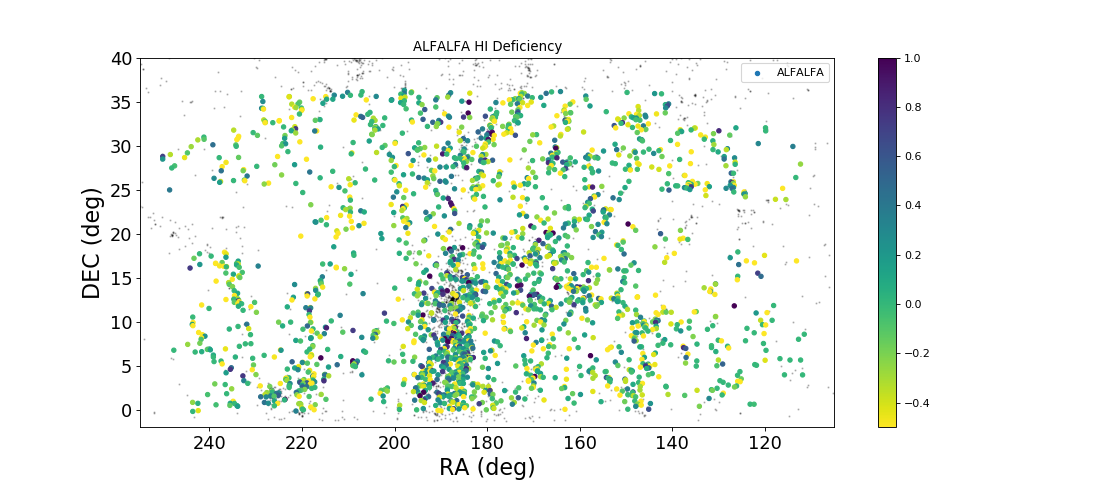

Text(0.5, 1.0, 'ALFALFA HI Deficiency')

In [62]:
flag = v.main['A100flag']
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-.5,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA HI Deficiency')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


<IPython.core.display.Javascript object>


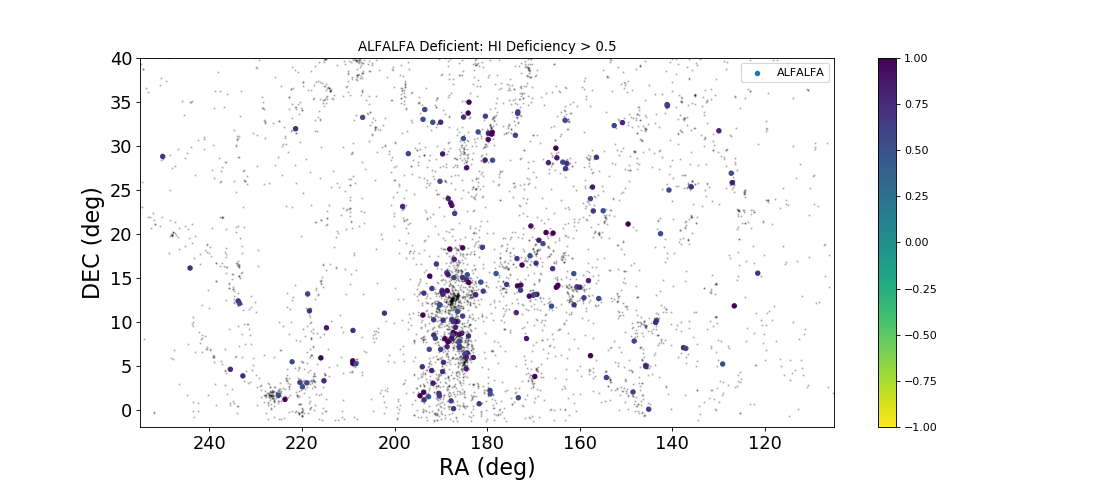

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


<IPython.core.display.Javascript object>


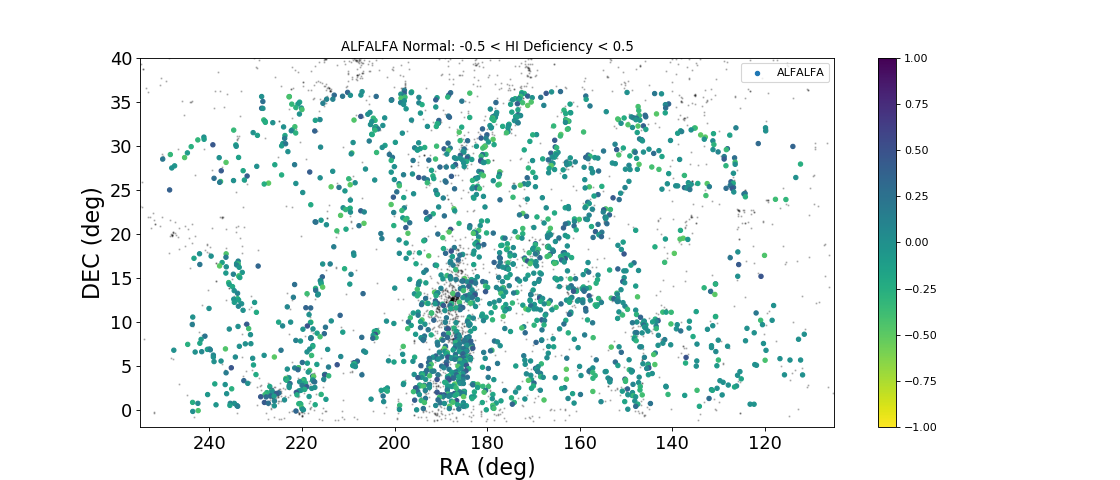

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


<IPython.core.display.Javascript object>


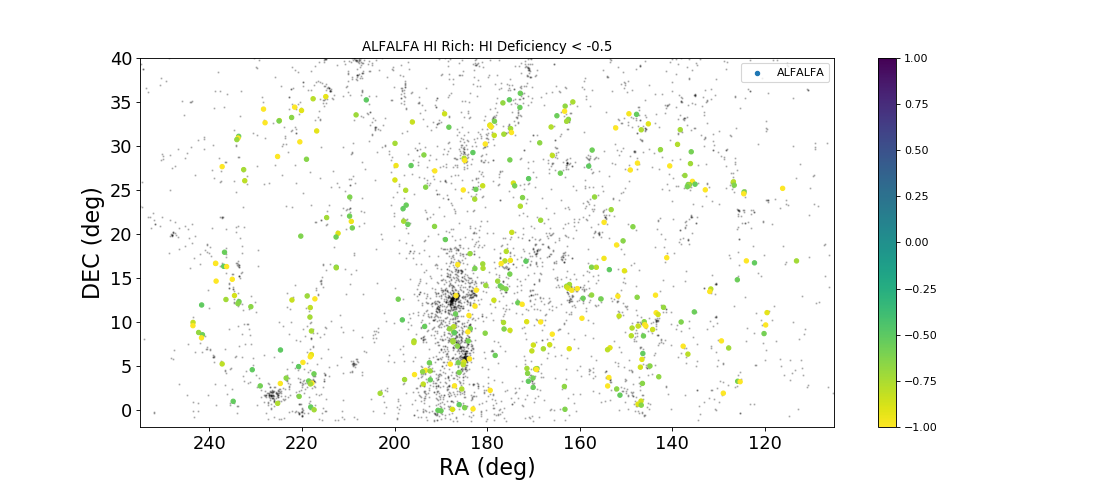

Text(0.5, 1.0, 'ALFALFA HI Rich: HI Deficiency < -0.5')

In [63]:
# deficient galaxies
flag = v.main['A100flag'] & (v.a100['HIdef_bytype'] > .5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA Deficient: HI Deficiency > 0.5')
# deficient galaxies
flag = v.main['A100flag'] & (v.a100['HIdef_bytype'] < .5)  & (v.a100['HIdef_bytype'] > -.5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA Normal: -0.5 < HI Deficiency < 0.5')
# deficient galaxies
flag = v.main['A100flag'] &  (v.a100['HIdef_bytype'] < -.5)
plot_subset(flag,'ALFALFA',color=v.a100['HIdef_bytype'],cbscale=(-1,1))
plt.ylim(-2,40)
plt.xlim(105,255)
plt.gca().invert_xaxis()
plt.title('ALFALFA HI Rich: HI Deficiency < -0.5')

# Checking coordinates

* some are f4 and others are f8
* not sure what the combined RA is not f8 because I specifically declare it as 'f' clean_kitchen_sink

In [64]:
%run ~/github/Virgo/programs/readtables.py
# HL
print(v.hl['RA'].dtype)
print(v.hl['al2000'].dtype)
# NSA v0
print(v.nsav0['RA_1'].dtype)
print(v.nsav0['RA_2'].dtype)
# NSA v1
print(v.nsav1['RA_1'].dtype)
print(v.nsav1['RA_2'].dtype)
# A100

print(v.a100['RA'].dtype)
print(v.a100['RAdeg_Use'].dtype)

>f8
>f8
>f8
>f8
>f8
>f8
>f8
>f8


In [65]:
t = np.zeros(10,'f8')
print(t[0].dtype)

float64


# Plots to make

* compare ALFALFA HI and Nancy HI


In [66]:
v.co['MHI']

<MaskedColumn name='MHI' dtype='float64' length=6797>
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
...
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

# Tables for Catalog papers

* starting with code from a100 paper

### Main Table

* VFID
* our RA, DEC, recession velocity
* HL objname, RA, DEC, vr
* NSA v0 objname, RA, DEC, Z
* NSA v1 objname, RA, DEC, Z
* ALFALFA name, ra, dec, vr, HImass
* flag for CO (Gianluca's paper)
* flag of HI (Gianluca's paper)

In original list, but removed:
* (photometry from JM)
* (our SFR, logMstar)

### Environment

supergalactic coordinates
local density sigma$_5$
local density sigma 10
filament/field/cluster flag
closest filament
orientation wrt filament
redshift-independent distance
flow-corrected distance/recession velocity
group membership
group halo mass

### Filaments

number of galaxies in filament
size (length, volume, etc)
range in SG coordinates
richness

For each filament, give coordinates of spine in SG coordinates, distance, and also RA, DEC

    RA,DEC
    SG X, Y, Z (Mpc)
    position angle (tangent to filament at that point)


In [1]:
%run ~/github/Virgo/programs/write_tables_catalog_paper.py

In [2]:
v.print_cat_table()
v.print_env_table()

/home/rfinn/research/Virgo/papers/catalog_paper/cat_table.tex
/home/rfinn/research/Virgo/papers/catalog_paper/env_table.tex


In [13]:
!less /home/rfinn/research/Virgo/papers/catalog_paper/cat_table.tex

\begin{sidewaystable*}%[ptbh!]
\begin{center}
\scriptsize
\setlength\tabcolsep{3.0pt} 
\tablenum{4} 
\caption{Main Catalog with Cross IDs\label{tab:main}  } 
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline 
\toprule 
VFID   & RA &   DEC &   $v_{r}$ & $v_{\rm cosmic}$ &  $v_{\rm model}$  & HL~name & NED Name & PGC & NSA V0 & NSA V1 & AGC  & CO  & A100  \\ 
& (deg, J2000) & (deg, J2000) & $\rm km~s^{-1}$ & $\rm km~s^{-1}$ & $\rm km~s^{-1}$ & & & &  & & && \\ 
(1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) & (9) & (10) & (11) & (12)& (13) & (14) \\ 
\hline 
\hline 
3000 & 165.930807 & 28.88713 & 708 & 1189 & 644 &NGC3510& NGC 3510& 33408 & 100677& 472983& 6126&False&True\\ 
3001 & 149.190405 & 28.82596 & 510 & 687 & 495 &UGC05340& UGC 05340& 28714 & 136251& 623560& 5340&False&True\\ 
3002 & 194.776643 & 28.81178 & 998 & 1177 & 1177 &PGC1846725& WISEA J125906.48+284842.6& 1846725 & 89104& 427578& -999&False&False\\ 
:home/rfinn/research/Virgo/papers/catalog_paper/cat_table.tex

### Full latex tables for journal

the journal requires the full tables, and latex format is ok.

In [3]:
%run ~/github/Virgo/programs/write_tables_catalog_paper.py
v.write_full_latex_tables()

/home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_cat_table_full.20-Aug-2022.tex
/home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_cat_table_full.20-Aug-2022.tex
/home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_env_table_full.20-Aug-2022.tex


In [8]:
!ls -lht /home/rfinn/research/Virgo/papers/catalog_paper/*.tex

-rw-rw-r-- 1 rfinn rfinn 854K Mar 13 17:30 /home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_env_table_full.13-Mar-2022.tex
-rw-rw-r-- 1 rfinn rfinn 825K Mar 13 17:30 /home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_cat_table_full.13-Mar-2022.tex
-rw-rw-r-- 1 rfinn rfinn 2.2K Mar 13 17:29 /home/rfinn/research/Virgo/papers/catalog_paper/env_table.tex
-rw-rw-r-- 1 rfinn rfinn 2.1K Mar 13 17:29 /home/rfinn/research/Virgo/papers/catalog_paper/cat_table.tex
-rw-rw-r-- 1 rfinn rfinn 629K Oct 22 21:02 /home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_env_table_full.22-Oct-2021.tex
-rw-rw-r-- 1 rfinn rfinn 824K Oct 22 21:02 /home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_cat_table_full.22-Oct-2021.tex
-rw-rw-r-- 1 rfinn rfinn 631K Oct  8 08:12 /home/rfinn/research/Virgo/papers/catalog_paper/castignani2021_env_table_full.08-Oct-2021.tex
-rw-rw-r-- 1 rfinn rfinn 827K Oct  8 08:12 /home/rfinn/research/Virgo/papers/catalog_paper/castignani2021

### Write out fits version of full tables

These are stored in 

In [4]:
%run ~/github/Virgo/programs/write_tables_catalog_paper.py
v.write_full_fits_tables()

/home/rfinn/research/Virgo/tables-north/v2/castignani2021_cat_table_full.20-Aug-2022.fits
/home/rfinn/research/Virgo/tables-north/v2/castignani2021_env_table_full.20-Aug-2022.fits


# Edge effects - plotting full NSA catalog vs our

In [76]:
nsa = Table.read('/home/rfinn/research/NSA/nsa_v1_0_1.fits')

In [77]:
# using a 20 deg slice around our coord
leftflag = (nsa['RA'] < 110) & (nsa['RA'] > 80)
rightflag = (nsa['RA'] > 280) & (nsa['RA'] < 300)
rabox = (nsa['RA'] > 80) & (nsa['RA'] < 300)
decflag = ((nsa['DEC'] > 75) | (nsa['DEC'] < -1.3))
zflag = (nsa['Z']*3e5 < 3500) & (nsa['Z']*3.e5 > 500)
nflag = zflag & (leftflag | rightflag | (~leftflag & ~rightflag & decflag & rabox) )

In [78]:
sum(nflag)

352

<IPython.core.display.Javascript object>


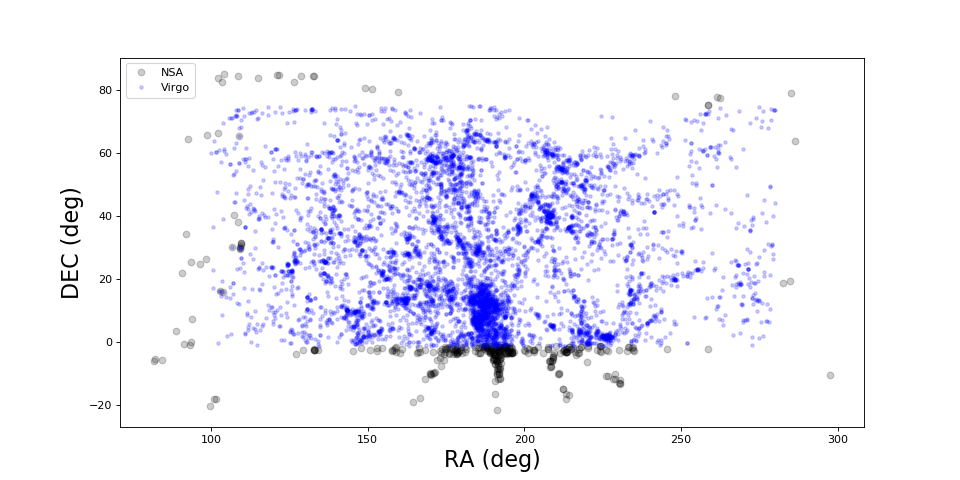

Text(0, 0.5, 'DEC (deg)')

In [79]:
plt.figure(figsize=(12,6))
plt.plot(nsa['RA'][nflag],nsa['DEC'][nflag],'ko',alpha=.2,label='NSA')
plt.plot(v.main['RA'],v.main['DEC'],'b.',alpha=.2,label='Virgo')
plt.legend()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)

# Testing 3D Plots

* show SGX, SGY, SGZ for filament members (filament catalog)

* overplot spines

* versions color coded by
  * 3D distance
  * local density n5 3D
  * show
    * members (big)
    * all galaxies (small)
    * CO sources
  * with groups vs non group galaxies

### Test filaments

* NGC Filament (good example)
* one filament that we detected, to motivate why we need to discuss in more detail the filament selection process

In [4]:
os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])
print(allfil)

{'W-M_Sheet', 'Canes_Venatici_Filament', 'Virgo_Coma_Berenices_Filament', 'VirgoIII_Filament', 'LeoII_B_Filament', 'NGC5353_4_Filament', 'Virgo_Draco_Filament', 'Virgo_Bootes_Filament', 'Ursa_Major_Cloud', 'Virgo_Serpens_Filament', 'Leo_Minor_Filament', 'Leo_Minor_B_Filament', 'LeoII_A_Filament'}


In [5]:
virgoCommon.SGXrange['NGC5353_4_Filament']

[-15, 15]

In [6]:
filament_string = 'NGC5353_4_Filament'
filament_string = 'VirgoIII_Filament'
filflag = v.fil['filament'] == filament_string
# set limits of cube
fxlim=[-11,-5]
fylim = [11,18]
fzlim = [3,12]
# read in spine
spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
spine  = Table.read(spinedir+'filament_spine_'+filament_string+'.fits')

In [7]:
os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])
print(allfil)

{'W-M_Sheet', 'Canes_Venatici_Filament', 'Virgo_Coma_Berenices_Filament', 'VirgoIII_Filament', 'LeoII_B_Filament', 'NGC5353_4_Filament', 'Virgo_Draco_Filament', 'Virgo_Bootes_Filament', 'Ursa_Major_Cloud', 'Virgo_Serpens_Filament', 'Leo_Minor_Filament', 'Leo_Minor_B_Filament', 'LeoII_A_Filament'}


In [5]:

def make_3dplot(vmin,vmax,color,colorname,flag=None):
    if flag is not None:
        filflag=flag
        
    fig = plt.figure(figsize=(10,8)) 
    # syntax for 3-D projection 
    ax = plt.axes(projection ='3d') 
    
    xmin = min(v.fil['SGX'][filflag]) - 2
    xmax = max(v.fil['SGX'][filflag]) + 2
    
    ymin = min(v.fil['SGY'][filflag]) - 2
    ymax = max(v.fil['SGY'][filflag]) + 2
    
    zmin = min(v.fil['SGZ'][filflag]) - 2
    zmax = max(v.fil['SGZ'][filflag]) + 2
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_zlim(zmin,zmax)
    
    
    clipflag = (v.fil['SGX'] > xmin) & (v.fil['SGX'] < xmax) & (v.fil['SGY'] > ymin) & (v.fil['SGY'] < ymax) & (v.fil['SGZ'] > zmin) & (v.fil['SGZ'] < zmax) 
    # plotting 
    #ize = (np.log10(v.nsav0['MASS'])-7)*30
    p = ax.scatter(v.fil['SGX'][filflag], v.fil['SGY'][filflag], v.fil['SGZ'][filflag],c=color[filflag],s=30,vmin=vmin,vmax=vmax)#,cmap='gnuplot') 
    flag = filflag & v.main['COflag']
    #p = ax.scatter(v.fil['SGX'][flag], v.fil['SGY'][flag], v.fil['SGZ'][flag],c=color[flag],s=100,vmin=vmin,vmax=vmax)
    cb = fig.colorbar(p,fraction=.046,pad=.04)
    cb.ax.tick_params(labelsize=10)
    cb.set_label(label=colorname,size='large')
    ax.plot3D(v.fil['SGX'][clipflag], v.fil['SGY'][clipflag], v.fil['SGZ'][clipflag],'c.',color='0.5',alpha=.4) 
    ax.set_title(filament_string.replace('_',' ').replace('-',' '),fontsize=20)
    ax.set_xlabel('$SGX/h_{74}$',fontsize=20)
    ax.set_ylabel('$SGY/h_{74}$',fontsize=20)
    ax.set_zlabel('$SGZ/h_{74}$',fontsize=20)

    
    #ax.set_xlim(fxlim[0],fxlim[1])
    #ax.set_ylim(fylim[0],fylim[1])
    #ax.set_zlim(fzlim[0],fzlim[1])
    #ax.axis('equal')

    ax.plot3D(spine['SGX'], spine['SGY'], spine['SGZ'],'k') 
    plt.show() 
    return ax
    
def plot3d_colorby_dist3D(flag=None):
    vmin,vmax = .22,5
    color = v.fil['filament_dist_3D']
    colorname='dist_3D'
    ax = make_3dplot(vmin,vmax,color,colorname,flag=flag)
    return ax

def plot3d_colorby_localdens(flag=None):
    vmin,vmax = -1,1.5
    color = np.log10(v.env['n5th'])
    colorname='n5th_3D'
    ax = make_3dplot(vmin,vmax,color,colorname,flag=flag)
    return ax

def plot3d_colorby_mass(flag=None):
    vmin,vmax = 8,10
    color = np.log10(v.nsav0['MASS'])
    colorname='NSA Mass'
    ax = make_3dplot(vmin,vmax,color,colorname,flag=flag)
    return ax

In [9]:
virgoCommon.filaments

['Ursa_Major_Cloud',
 'Canes_Venatici_Filament',
 'LeoII_B_Filament',
 'LeoII_A_Filament',
 'VirgoIII_Filament',
 'Leo_Minor_B_Filament',
 'W-M_Sheet',
 'Virgo_Bootes_Filament',
 'Virgo_Coma_Berenices_Filament',
 'NGC5353_4_Filament',
 'Virgo_Serpens_Filament',
 'Virgo_Draco_Filament']

In [8]:
%matplotlib notebook
for fil in virgoCommon.filaments:
    print(fil)
    filament_string = fil
    if fil.find('Ursa_Major') < 0:
        continue
    
    filflag = (v.fil['filament'] == filament_string) & (v.fil['filament_member'])
    # set limits of cube
    fxlim = virgoCommon.SGXrange[filament_string]
    fylim = virgoCommon.SGYrange[filament_string]
    fzlim = virgoCommon.SGZrange[filament_string]
    
    #boxsize = np.max(deltas)
    # read in spine
    print(fil)
    if sum(filflag) < 1:
        print('\t no galaxies found in ',fil)
        print('\t skipping this filament')
        continue
    spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
    spine  = Table.read(spinedir+'filament_spine_'+filament_string+'.fits')
    #plot3d_colorby_dist3D(flag=filflag)
    plot3d_colorby_localdens(flag=filflag)
    plt.show()

Ursa_Major_Cloud
Ursa_Major_Cloud


<IPython.core.display.Javascript object>

Canes_Venatici_Filament
LeoII_B_Filament
LeoII_A_Filament
VirgoIII_Filament
Leo_Minor_B_Filament
W-M_Sheet
Virgo_Bootes_Filament
Virgo_Coma_Berenices_Filament
NGC5353_4_Filament
Virgo_Serpens_Filament
Virgo_Draco_Filament


In [9]:
plot3d_colorby_localdens(flag=filflag)

<IPython.core.display.Javascript object>

Exception ignored in: <function Comm.__del__ at 0x7fd635bdfcb0>
Traceback (most recent call last):
  File "/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('951c87330eb54797a50f9f2e2477fc17',)
Exception ignored in: <function Comm.__del__ at 0x7fd635bdfcb0>
Traceback (most recent call last):
  File "/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/home/rfinn/anaconda3/lib/python3.7/site-packa

<Axes3DSubplot:title={'center':'Virgo Draco Filament'}, xlabel='$SGX/h_{74}$', ylabel='$SGY/h_{74}$'>

In [7]:
virgoCommon.SGX['Canes_B_Filament']

KeyError: 'Canes_B_Filament'

<IPython.core.display.Javascript object>


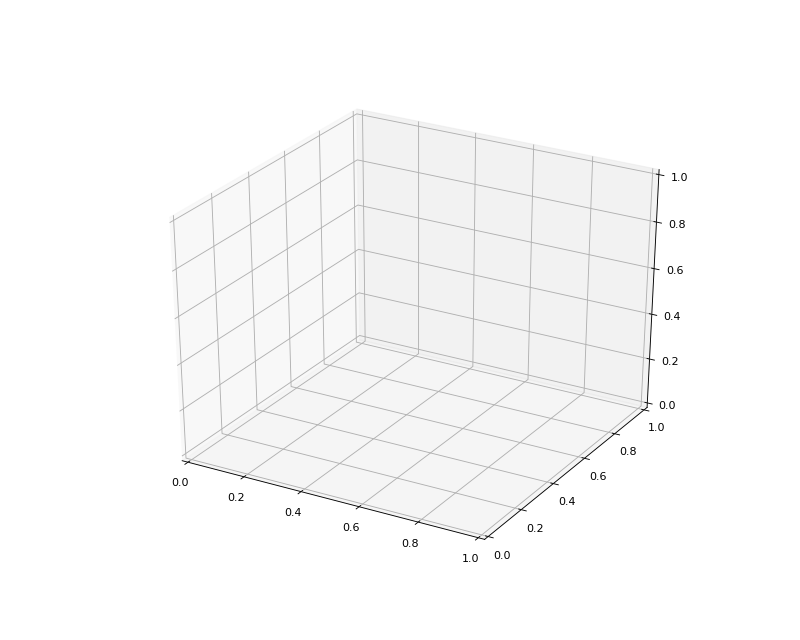

UnboundLocalError: local variable 'filflag' referenced before assignment

In [43]:
for fil in allfil:
    filament_string = fil
    filflag = (v.fil['filament'] == filament_string) & (v.fil['filament_member'])
    # set limits of cube
    fxlim = virgoCommon.SGXrange[filament_string]
    fylim = virgoCommon.SGYrange[filament_string]
    fzlim = virgoCommon.SGZrange[filament_string]
    # read in spine
    spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
    spine  = Table.read(spinedir+'filament_spine_'+filament_string+'.fits')
    #plot3d_colorby_dist3D()
    plot3d_colorby_localdens(flag=filflag)
    #plot3d_colorby_mass()

# 3D Plot of Virgo III for Paper

<IPython.core.display.Javascript object>


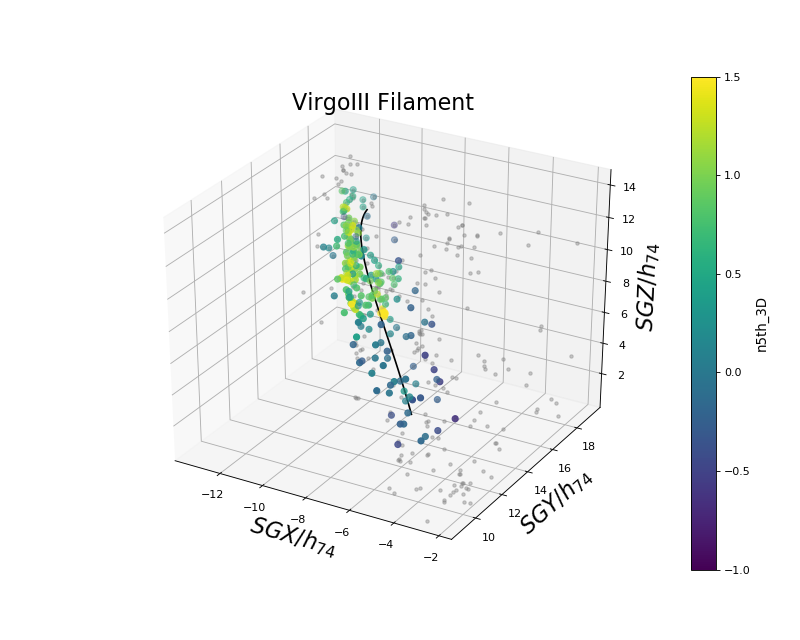

In [43]:
os.chdir(plotdir)
%matplotlib notebook
thisfil = ['VirgoIII_Filament']
for fil in thisfil:
    filament_string = fil
    filflag = (v.fil['filament'] == filament_string) & (v.fil['filament_member'])
    # set limits of cube
    fxlim = virgoCommon.SGXrange[filament_string]
    fylim = virgoCommon.SGYrange[filament_string]
    fzlim = virgoCommon.SGZrange[filament_string]
    # read in spine
    spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
    spine  = Table.read(spinedir+'filament_spine_'+filament_string+'.fits')
    ax = plot3d_colorby_localdens(flag=filflag)
    #ax.set_title('Virgo III Filament',fontsize=20)
    #plot3d_colorby_mass()
plt.savefig('virgoIII-3d.png')
plt.savefig('virgoIII-3d.pdf')

In [ ]:
plot3d_colorby_localdens()

# Filament Names

* our current set of names is

In [12]:
from astropy.coordinates import get_constellation
from astropy.coordinates import SkyCoord

In [13]:
os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])
print(allfil)

{'Virgo_Serpens_Filament', 'LeoII_B_Filament', 'Virgo_Draco_Filament', 'LeoII_A_Filament', 'Virgo_Coma_Berenices_Filament', 'Leo_Minor_Filament', 'NGC5353_4_Filament', 'VirgoIII_Filament', 'W-M_Sheet', 'Ursa_Major_Cloud', 'Leo_Minor_B_Filament', 'Canes_Venatici_Filament'}


##############################
###   Virgo_Serpens_Filament
##############################


<IPython.core.display.Javascript object>


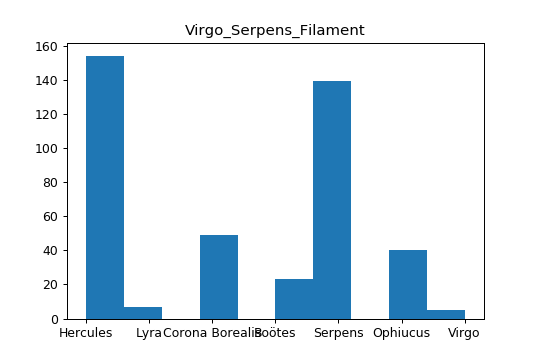

##############################
###   LeoII_B_Filament
##############################


<IPython.core.display.Javascript object>


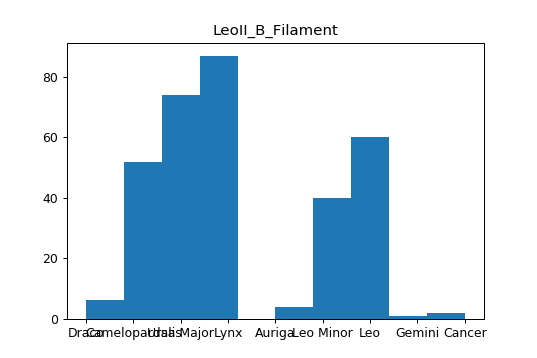

##############################
###   Virgo_Draco_Filament
##############################


<IPython.core.display.Javascript object>


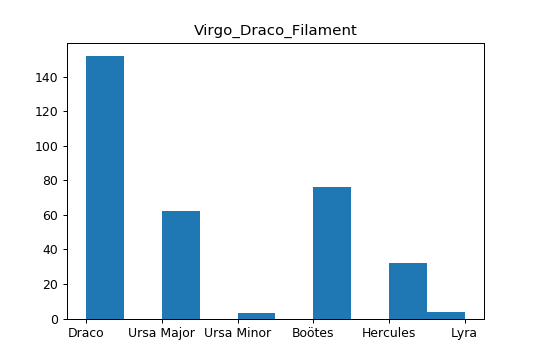

##############################
###   LeoII_A_Filament
##############################


<IPython.core.display.Javascript object>


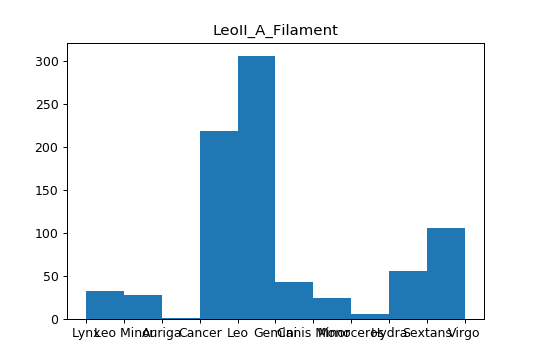

##############################
###   Virgo_Coma_Berenices_Filament
##############################


<IPython.core.display.Javascript object>


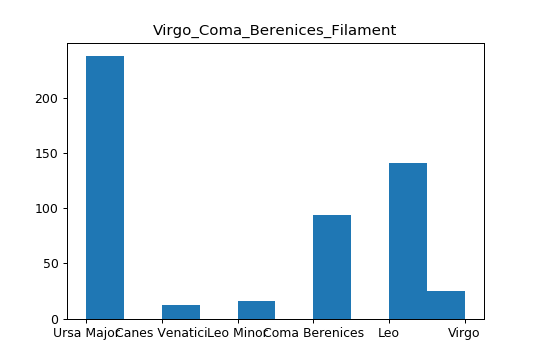

##############################
###   Leo_Minor_Filament
##############################


<IPython.core.display.Javascript object>


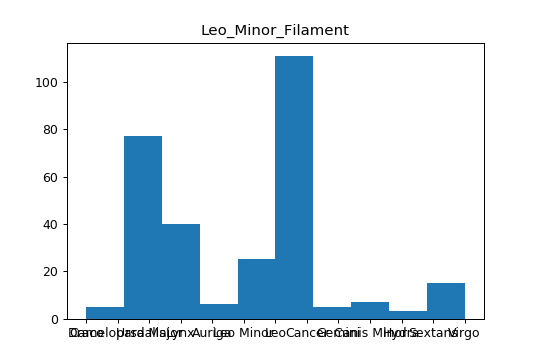

##############################
###   NGC5353_4_Filament
##############################


<IPython.core.display.Javascript object>


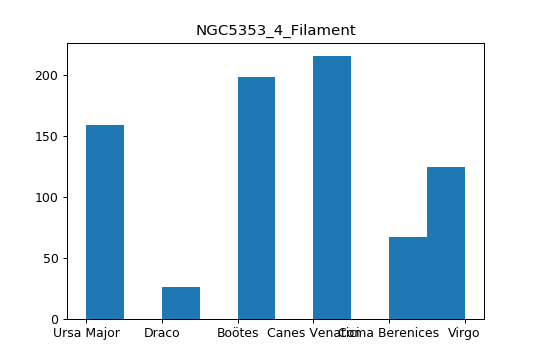

##############################
###   VirgoIII_Filament
##############################


<IPython.core.display.Javascript object>


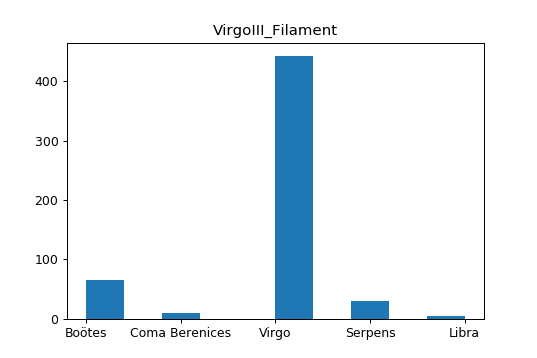

##############################
###   W-M_Sheet
##############################


<IPython.core.display.Javascript object>


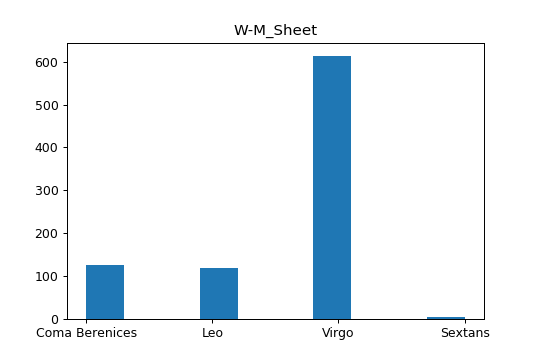

##############################
###   Ursa_Major_Cloud
##############################


<IPython.core.display.Javascript object>


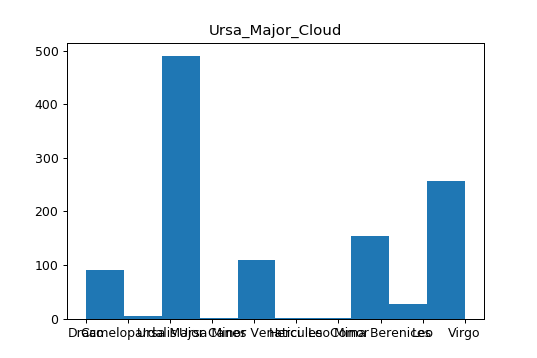

##############################
###   Leo_Minor_B_Filament
##############################


<IPython.core.display.Javascript object>


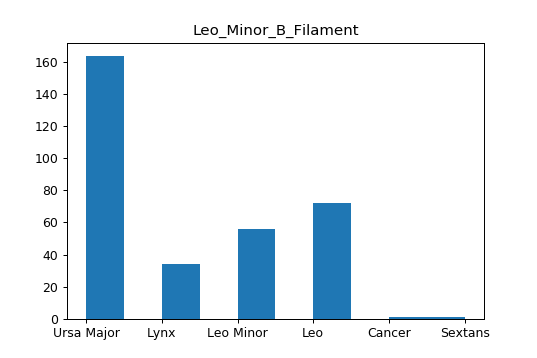

##############################
###   Canes_Venatici_Filament
##############################


<IPython.core.display.Javascript object>


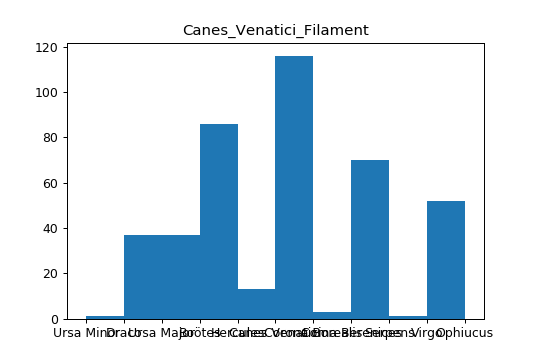

In [14]:
for f in allfil:
    print('##############################')
    print('###  ',f)
    print('##############################')
    flag = v.fil['filament'] == f
    fcoord = SkyCoord(v.main['RA'][flag],v.main['DEC'][flag],unit='deg',frame='icrs')
    fconst = get_constellation(fcoord)
    #print(fconst)
    plt.figure(figsize=(6,4))
    t = plt.hist(fconst)
    plt.title(f)
    a,b = plt.xticks()
    try:
        print('most frequency constellation = ',b[t[0] == max(t[0])])
    except TypeError:
        #print('is it obvious?')
        continue
    print('')
    time.sleep(.5)

# Visualizing Filaments in SGX-SGZ plane, in chunks of SGY

Kim+2016 say that they visually identify filaments by looking for structures that persist in multiple cuts of SGY

In [15]:
# read in tables

plotdir = '/home/rfinn/research/Virgo/plots/'
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtables.py

In [16]:
def plotspines(ymin,ymax):
    spinedir = '/home/rfinn/research/Virgo/tables-north/spines/'
    sfiles = glob.glob(spinedir+"*.fits")
    for f in sfiles:
        spine  = Table.read(f)
        flag = (spine['SGY'] > ymin) & (spine['SGY'] < ymax)
        fname = os.path.basename(f).replace('filament_spine_','').replace('.fits','').replace('_Filament','')
        plt.plot(spine['SGX'][flag],spine['SGZ'][flag],lw=3,zorder=15,label=fname)

<IPython.core.display.Javascript object>


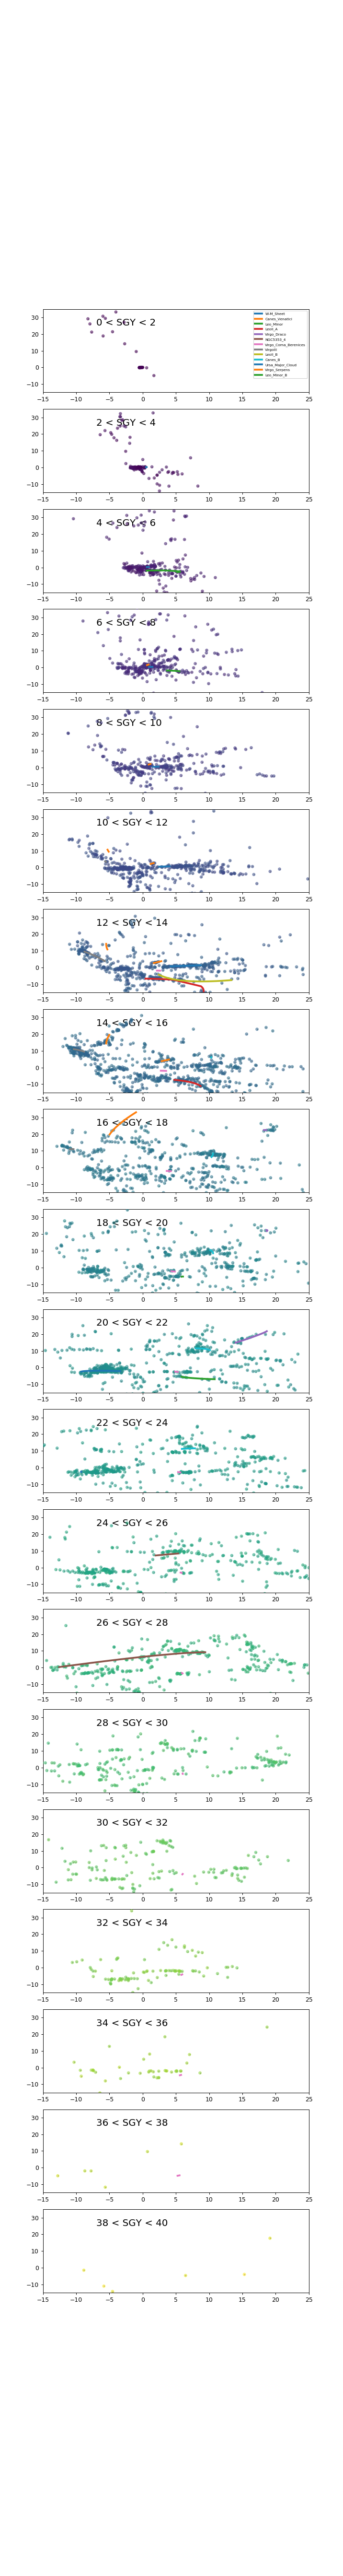

In [17]:
x = v.env['SGX']
y = v.env['SGY']
z = v.env['SGZ']

delta_y = 2
ymin=np.arange(0,40,delta_y)
ymax = ymin + delta_y
nrows = len(ymin)
ra=v.main['RA']
dec = v.main['DEC']


plt.figure(figsize=(8,60))
for i in range(len(ymin)):
    plt.subplot(nrows,1,i+1)
    yflag = (y < ymax[i]) & (y > ymin[i])
    #plt.plot(ra,dec,'k.',color='.5',alpha=.5)
    plt.plot(x[yflag],z[yflag],'k.',color='.2',alpha=.5,markersize=2)
    fflag = yflag & (v.fil['filament'] != '---')
    plt.scatter(x[fflag],z[fflag],c=y[fflag],s=20,vmin=2,vmax=40,zorder=10,alpha=.5)
    s = '%i < SGY < %i'%(ymin[i],ymax[i])
    plt.text(.2,.8,str(s),fontsize=16,transform=plt.gca().transAxes)
    plotspines(ymin[i],ymax[i])
    plt.axis([-15,25,-15,35])
    # zooming in to new structure
    #plt.axis([5,15,5,15])
    if i == 0:
        plt.legend(fontsize=6)
#plt.savefig('filaments-SGY-slice.pdf')

# Make 3D Plot of new filament

In [ ]:
xc = -2.3
yc = 9.9
zc=-0.42
xmin = xc-5
xmax = xc+5
ymin = yc-10
ymax = yc+10
zmin = zc-5
zmax = zc+5

x = v.fil['SGX']
y = v.fil['SGY']
z = v.fil['SGZ']

flag = (x > xmin) & (x < xmax) & (y > ymin) & (y < ymax) & (z > zmin) & (z < zmax)


In [ ]:
filament_string='Virgo'
vmin,vmax = -1,2
color = np.log10(v.env['n5th'])
colorname='n5th_3D'
 
#vmin,vmax = 8,10
#color = np.log10(v.nsav0['MASS'])
#colorname='Mass'
fig = plt.figure(figsize=(10,8)) 
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
p = ax.scatter(v.fil['SGX'][flag], v.fil['SGY'][flag], v.fil['SGZ'][flag],c=color[flag],s=10,vmin=vmin,vmax=vmax)
fig.colorbar(p,label=colorname)
#ax.plot3D(v.fil['SGX'][clipflag], v.fil['SGY'][clipflag], v.fil['SGZ'][clipflag],'c.',color='0.5',alpha=.4) 
ax.set_title(filament_string)
ax.set_xlabel('SGX')
ax.set_ylabel('SGY')
ax.set_zlabel('SGZ')

In [9]:
%matplotlib notebook

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


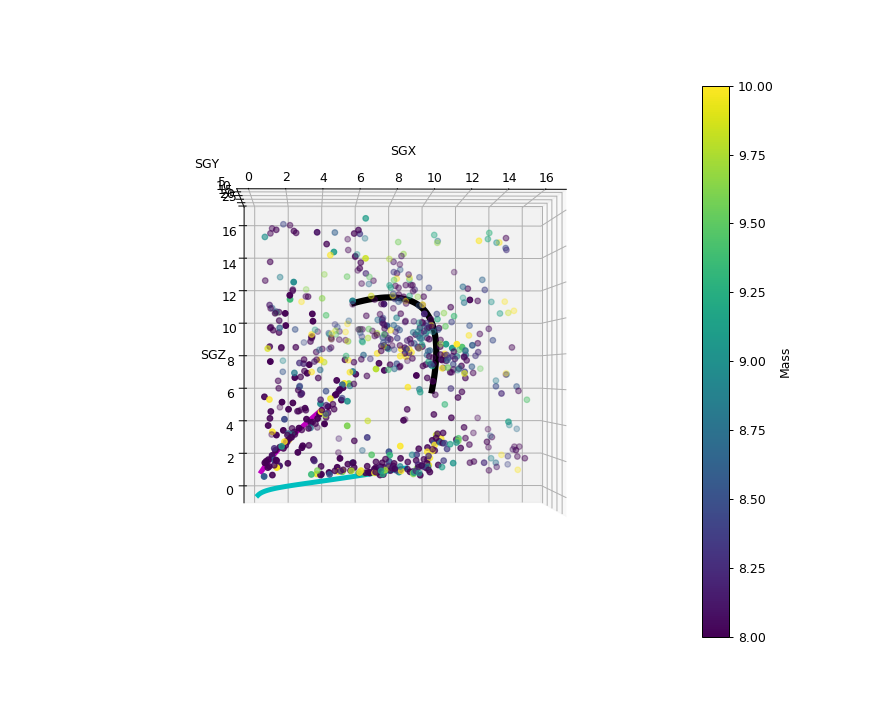

In [25]:
vmin,vmax = 8,10
color = np.log10(v.nsav0['MASS'])
colorname='Mass'
x = v.fil['SGX']
y = v.fil['SGY']
z = v.fil['SGZ']
flag = (x > .6) & (x <16) & \
       (y > 6) & (y< 25) & \
       (z >1) & (z< 16)
fig = plt.figure(figsize=(10,8)) 
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
p = ax.scatter(v.fil['SGX'][flag], v.fil['SGY'][flag], v.fil['SGZ'][flag],c=color[flag],s=20,vmin=vmin,vmax=vmax)
fig.colorbar(p,label=colorname)
#ax.plot3D(v.fil['SGX'][clipflag], v.fil['SGY'][clipflag], v.fil['SGZ'][clipflag],'c.',color='0.5',alpha=.4) 
#ax.set_title(filament_string)
ax.set_xlabel('SGX')
ax.set_ylabel('SGY')
ax.set_zlabel('SGZ')
#ax.set_axis('equal')
spine = Table.read('/home/rfinn/research/Virgo/tables-north/spines/filament_spine_Canes_B_Filament.fits')
ax.plot3D(spine['SGX'], spine['SGY'], spine['SGZ'],'k',lw=5) 
spine = Table.read('/home/rfinn/research/Virgo/tables-north/spines/filament_spine_Canes_Venatici_Filament.fits')
ax.plot3D(spine['SGX'], spine['SGY'], spine['SGZ'],'m',lw=4) 

spine = Table.read('/home/rfinn/research/Virgo/tables-north/spines/filament_spine_Ursa_Major_Cloud.fits')
ax.plot3D(spine['SGX'], spine['SGY'], spine['SGZ'],'c',lw=4) 



In [ ]:
plt.figure()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1)
x = v.fil['SGX']
y = v.fil['SGY']
z = v.fil['SGZ']
flag = (x > 7.5) & (x < 10) & (z > 6 ) & (z < 12) & (y > 16) & (y < 22)
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ro',markersize=4,alpha=.3)
plt.gca().invert_xaxis()

# Write out data for Mary McColgan

* cube with Virgo III filament
  * ID
  * SGX, SGY, SGZ
  * mass
  * brightness
  * size

* spine

* all files in csv

In [ ]:
v.fil

In [ ]:
v3flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.fil['filament_member'])

In [ ]:
marytab = Table([v.main['VFID'][v3flag],v.main['radius'][v3flag],\
                 v.fil['SGX'][v3flag],v.fil['SGY'][v3flag],v.fil['SGZ'][v3flag],\
                 v.nsav0['MASS'][v3flag],v.rphot['M_r'][v3flag],v.fil['filament_dist_3D'][v3flag]])

In [ ]:
marytab

In [ ]:
!pwd

In [ ]:
marytab.write('VirgoIII-filament.csv',format='csv')

In [ ]:
v3spine = Table.read('/home/rfinn/research/Virgo/tables-north/spines/filament_spine_VirgoIII_Filament.fits')

In [ ]:
v3spine.write('VirgoIII-spine.csv',format='csv')

# Angular diam distance at virgo

virial radius = 2 Mpc

trying to figure out what the physical scale of 15 deg is

In [ ]:
vcosmic = 1058
dist = vcosmic/75

In [ ]:
dist = 16

In [ ]:
from astropy import units as u

In [ ]:
angle = 1*u.deg

In [ ]:
angle = 1*2*3.14/360

In [ ]:
arclength = angle*dist

In [ ]:
arclength

In [ ]:
plt.figure()
t = plt.hist(v.main['vr'],bins=100)

In [ ]:
arclength*15

In [ ]:
v.env.colnames

In [ ]:
coord = SkyCoord(180*u.deg,10*u.deg,frame='icrs')
galactic_coord = coord.transform_to('galactic')
print(galactic_coord.l, galactic_coord.b)

In [ ]:
v.fil.colnames

# plot of density within 0.5, 1 and 1.5 Mpc for filaments

* get number of galaxies within 0.5, 1 and 1.5 Mpc from filaments
* calculate Ngal/area/length
* plot density vs distance

In [10]:
v.fil.colnames

['dist_3D_NGC5353_4_Filament',
 'dist_3D_W-M_Sheet',
 'filament_dist_2D',
 'dist_3D_LeoII_A_Filament',
 'VFID',
 'dist_2D_NGC5353_4_Filament',
 'dist_2D_Leo_Minor_Filament',
 'dist_2D_Canes_Venatici_Filament',
 'objname',
 'Vcosmic',
 'dist_3D_VirgoIII_Filament',
 'dist_2D_Virgo_Draco_Filament',
 'DEC',
 'SGY',
 'SGX',
 'SGZ',
 'dist_2D_Leo_Minor_B_Filament',
 'recno',
 'dist_3D_Virgo_Draco_Filament',
 't',
 'pa',
 'RA',
 'dist_3D_Virgo_Serpens_Filament',
 'filament',
 'filament_PA',
 'dist_2D_LeoII_B_Filament',
 'dist_3D_Canes_Venatici_Filament',
 'dist_2D_LeoII_A_Filament',
 'dist_2D_Virgo_Serpens_Filament',
 'dist_2D_VirgoIII_Filament',
 'dist_2D_Ursa_Major_Cloud',
 'dist_3D_LeoII_B_Filament',
 'orientation_wrt_filament',
 'dist_3D_Ursa_Major_Cloud',
 'dist_3D_Virgo_Coma_Berenices_Filament',
 'dist_3D_Leo_Minor_B_Filament',
 'dist_3D_Leo_Minor_Filament',
 'dist_2D_Virgo_Coma_Berenices_Filament',
 'dist_2D_Virgo_Bootes_Filament',
 'dist_2D_W-M_Sheet',
 'filament_dist_3D',
 'filament_

In [5]:
os.chdir(plotdir) 
%run ~/github/Virgo/programs/readtables.py
filflag = v.fil['filament'] != '---'
allfil = set(v.fil['filament'][filflag])
print(allfil)

{'Virgo_Serpens_Filament', 'VirgoIII_Filament', 'LeoII_B_Filament', 'Leo_Minor_B_Filament', 'Virgo_Coma_Berenices_Filament', 'Virgo_Draco_Filament', 'Leo_Minor_Filament', 'Ursa_Major_Cloud', 'Virgo_Bootes_Filament', 'W-M_Sheet', 'LeoII_A_Filament', 'NGC5353_4_Filament', 'Canes_Venatici_Filament'}


<Figure size 432x288 with 0 Axes>

##############################
###   LeoII_A_Filament
##############################
##############################
###   LeoII_B_Filament
##############################
##############################
###   Leo_Minor_Filament
##############################
##############################
###   VirgoIII_Filament
##############################
##############################
###   NGC5353_4_Filament
##############################
##############################
###   Virgo_Draco_Filament
##############################
##############################
###   Virgo_Serpens_Filament
##############################
##############################
###   Virgo_Coma_Berenices_Filament
##############################
##############################
###   Leo_Minor_B_Filament
##############################
##############################
###   Ursa_Major_Cloud
##############################
##############################
###   W-M_Sheet
##############################
##############################
###   Can

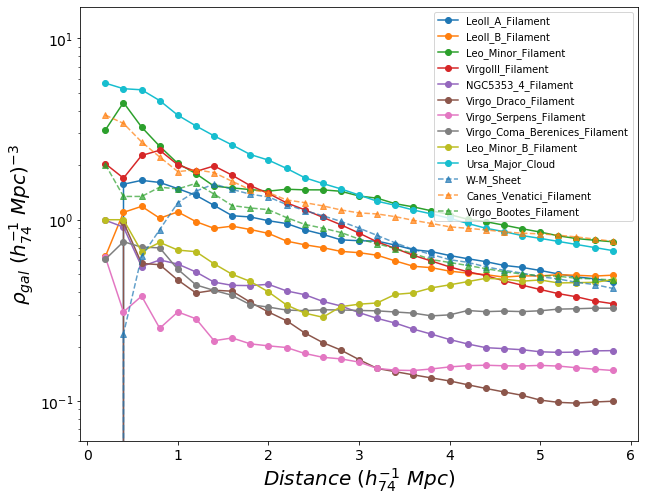

In [48]:
%matplotlib inline
os.chdir(plotdir) 
plt.figure(figsize=(10,8))
plt.subplots_adjust
for nfil,f in enumerate(virgoCommon.filaments):
    print('##############################')
    print('###  ',f)
    print('##############################')
    dist = np.array([.25,.5,1,1.5,2.,2.5,3],'f')
    stepsize=.2
    dist = np.arange(stepsize,6,stepsize)
    dens = np.zeros(len(dist),'f')
    length = virgoCommon.fil_lengths[f]
    colname = "dist_3D_{}".format(f)
    try:
        t = v.fil[colname]
    except KeyError:
        print('\t WARNING: no column named ',colname)
        continue
    for i,d in enumerate(dist):
        flag =  (v.fil[colname] < d) & (v.env['flag_clus'] == 0)
        #print(np.pi*d**2*length)
        dens[i] = sum(flag)/(np.pi*d**2*length)
        #dens[i] = sum(flag)/(length)
    #print(fconst)
    if nfil > len(virgoCommon.mycolors)-1:
        ls = '--'
        marker='^'
        alpha=.7
    else:
        ls = '-'
        marker='o'
        alpha=1
    plt.plot(dist,dens,label=f,marker=marker,ls=ls,alpha=alpha)
plt.gca().set_yscale('log')
plt.ylim(.06,15)
plt.legend(fontsize=10,loc='upper right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$Distance \ (h_{74}^{-1} \ Mpc)$',fontsize=20)
plt.ylabel(r'$ \rho _{gal}\ (h_{74}^{-1} \ Mpc)^{-3}$',fontsize=20)
#plt.xticks([.5,1.,1.5])

plt.savefig('density-profiles.png')
plt.savefig('density-profiles.pdf')

##############################
###   LeoII_A_Filament
##############################
##############################
###   LeoII_B_Filament
##############################
##############################
###   Leo_Minor_Filament
##############################
##############################
###   VirgoIII_Filament
##############################
##############################
###   NGC5353_4_Filament
##############################
##############################
###   Virgo_Draco_Filament
##############################
##############################
###   Virgo_Serpens_Filament
##############################
##############################
###   Virgo_Coma_Berenices_Filament
##############################
##############################
###   Leo_Minor_B_Filament
##############################
##############################
###   Ursa_Major_Cloud
##############################
##############################
###   W-M_Sheet
##############################
##############################
###   Can

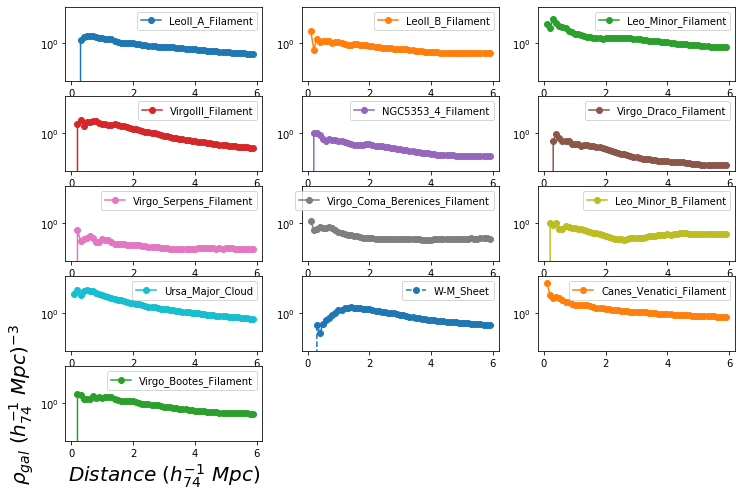

In [17]:
os.chdir(plotdir) 
plt.figure(figsize=(12,8))
nfil=0
for k,f in enumerate(virgoCommon.filaments):
    print('##############################')
    print('###  ',f)
    print('##############################')
    dist = np.array([.25,.5,1,1.5,2.,2.5,3],'f')
    stepsize=.1
    dist = np.arange(stepsize,6,stepsize)
    dens = np.zeros(len(dist),'f')
    length = virgoCommon.fil_lengths[f]
    colname = "dist_3D_{}".format(f)
    try:
        t = v.fil[colname]
    except KeyError:
        print('\t WARNING: no column named ',colname)
        continue
    for i,d in enumerate(dist):
        flag =  (v.fil[colname] < d) & (v.env['flag_clus'] == 0)
        #print(np.pi*d**2*length)
        dens[i] = sum(flag)/(np.pi*d**2*length)
        #dens[i] = sum(flag)/(length)
    #print(fconst)
    if nfil > len(virgoCommon.mycolors)-1:
        ls = '--'
        nfil=0
    else:
        ls = '-'
    plt.subplot(5,3,k+1)
    plt.plot(dist,dens,label=f,marker='o',ls=ls,color=virgoCommon.mycolors[nfil])
    plt.gca().set_yscale('log')
    plt.ylim(.06,15)
    plt.legend(fontsize=10,loc='upper right')
    nfil += 1
plt.xlabel(r'$Distance \ (h_{74}^{-1} \ Mpc)$',fontsize=20)
plt.ylabel(r'$ \rho _{gal}\ (h_{74}^{-1} \ Mpc)^{-3}$',fontsize=20)
#plt.xticks([.5,1.,1.5])

plt.savefig('density-profiles-multipanel.png')
plt.savefig('density-profiles-multipanel.pdf')

In [33]:
v.fil

<Table length=6797>
       SGY                 SGX         ...      filament       objname  
     float64             float64       ...      bytes40        bytes28  
------------------ ------------------- ... ------------------ ----------
11.738032079989287  13.145689815736862 ...   Ursa_Major_Cloud    NGC4363
 7.017661982903995    7.90894905971585 ... Leo_Minor_Filament    NGC4133
18.236938715608805   24.57232008873139 ...   LeoII_B_Filament    NGC2977
  14.3805709158205   16.04972421363977 ...   Ursa_Major_Cloud  PGC040048
 13.42946756799603  15.062039166171804 ...   Ursa_Major_Cloud   UGC07189
 14.24733084177353   16.36887945443161 ...   Ursa_Major_Cloud    NGC3752
14.429624490058709  23.823428368645985 ...   LeoII_B_Filament   UGC04202
13.506784603390928  23.147324448597697 ...   LeoII_B_Filament  PGC022064
  6.34142153819484  11.358746335611848 ...   Ursa_Major_Cloud    NGC6643
 13.57513261426242   15.04051810675452 ...   Ursa_Major_Cloud   UGC07238
               ...                 ... ...                ...        ...
26.677692322485886 -13.486639599767207 ... NGC5353_4_Filament   UGC07883
15.365245806045172 -10.329395658436509 ...  VirgoIII_Filament PGC1123741
6.4060681149299725 -2.1699810543271267 ... Leo_Minor_Filament PGC3286596
 26.00767790775234 -13.290425037005736 ... NGC5353_4_Filament PGC1123239
19.900737222095287   -9.58565131384563 ...          W-M_Sheet  PGC040683
17.414428225304132 -7.3066119171159345 ...          W-M_Sheet GAMA143446
24.621041828170757  -9.456379013071517 ...          W-M_Sheet PGC3288547
 23.16470968032566 -10.745670987988538 ...          W-M_Sheet PGC1122171
  21.9139265433092  -10.68297698963353 ...          W-M_Sheet  PGC135806
 10.46500368374368  -4.664287144328092 ...  VirgoIII_Filament   UGC07000

# moved density profiles to separate program

so we can fit exponential, etc

In [6]:
v.env.colnames

['DM',
 'VFID_1',
 'prefix',
 'radius',
 'objname',
 'Vcosmic',
 'M_r',
 'DEC',
 'radius_flag',
 'SGY',
 'SGX',
 'SGZ',
 'NSAID',
 'NEDname',
 'Dmedian',
 'nCI08',
 'RA',
 'Virgo_infall',
 'Steerflag',
 'HAflag',
 'distSGY_Virgo',
 'Vmodel',
 'distSGZ_Virgo',
 'HAobsflag',
 'V_LG',
 'FLUX_R',
 'OBJID',
 'mag_r',
 'nCI08_err',
 'n5th_2D',
 'name',
 'n5th_2D_err',
 'vr',
 'dr9_cat',
 'n5th',
 'distSGX_Virgo',
 'n5th_err',
 'VFID_2',
 'flag_clus_2',
 'flag_fil_2',
 'flag_fie',
 'flag_gro',
 'flag_fie_k',
 'flag_gro_k',
 'VFID_3',
 'flag_clus_3',
 'flag_gr',
 'flag_fil_3',
 'flag_pf']

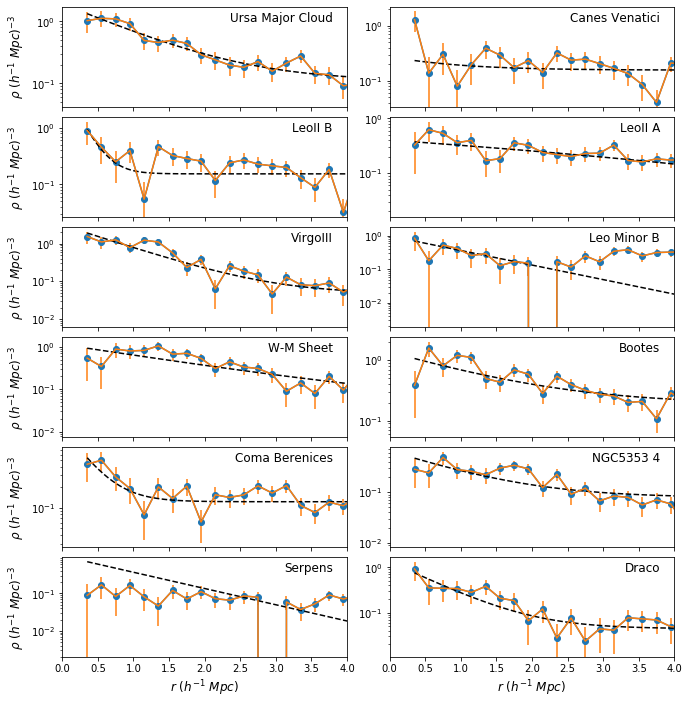

<Figure size 432x288 with 0 Axes>

In [6]:
%matplotlib inline
os.chdir(plotdir)
%run ~/github/Virgo/programs/density-profiles.py --magcut --samemag --stepsize .2
plt.show()
plt.savefig('filament_profiles-fixedMr.png')
plt.savefig('filament_profiles-fixedMr.pdf')

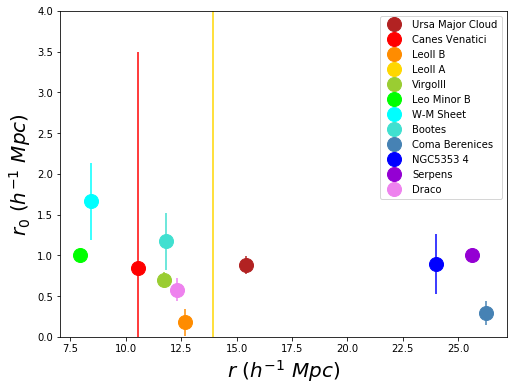

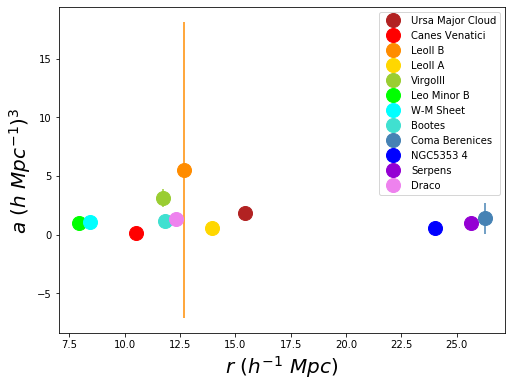

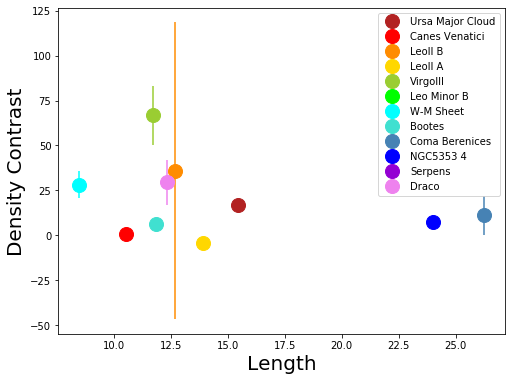

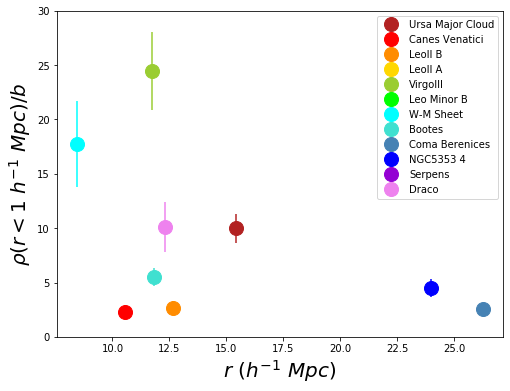

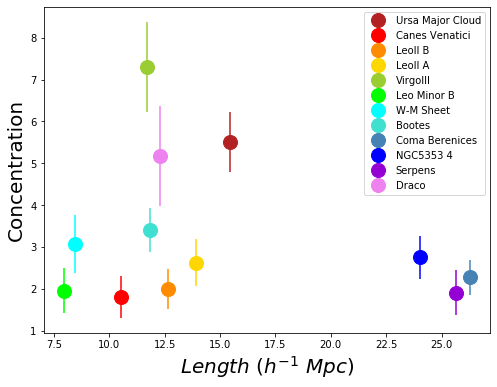

In [7]:
allfil = virgofilaments(f)
allfil.plot_scale_length_vs_length(ymax=4)
allfil.plot_central_density_vs_length()
allfil.plot_density_contrast_vs_length()
allfil.plot_central_density_contrast_vs_length(ymax=30)
allfil.plot_concentration_vs_length()

In [8]:
# statistics
run_spearman(alllengths,allscalelengths)
run_spearman(alllengths,allconc)
run_spearman(alllengths,alldensitycontrasts)


spearman rank test: rho=-0.01, p=0.9656
spearman rank test: rho=-0.03, p=0.9141
spearman rank test: rho=-0.15, p=0.6482


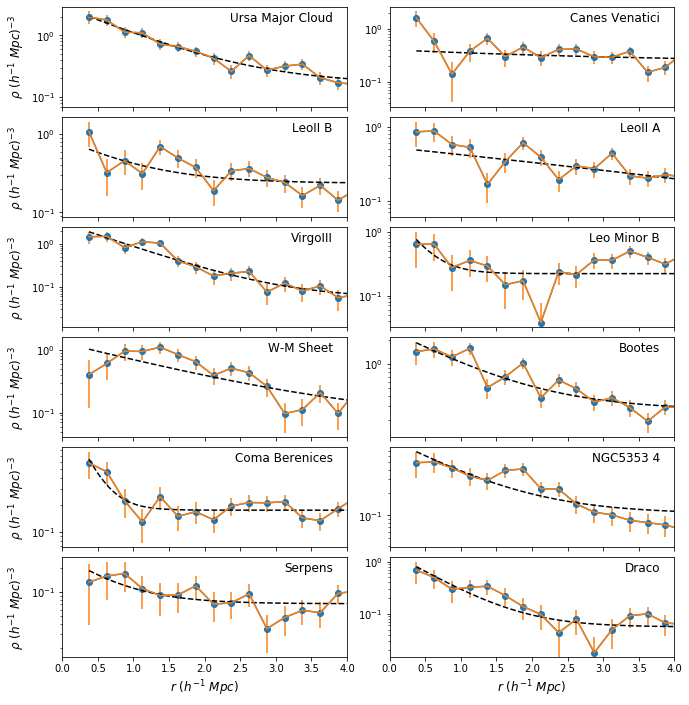

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
os.chdir(plotdir)
%run ~/github/Virgo/programs/density-profiles.py --magcut --stepsize 0.25
plt.show()
plt.savefig('filament_profiles_filament_Mr.png')
plt.savefig('filament_profiles_filament_Mr.pdf')

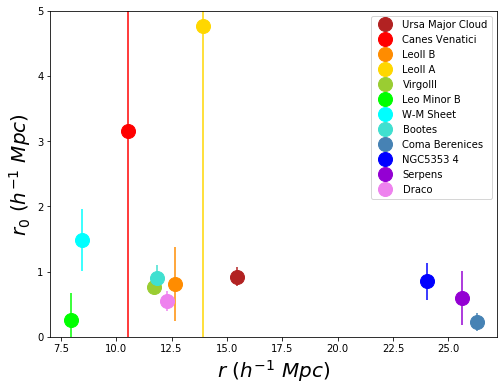

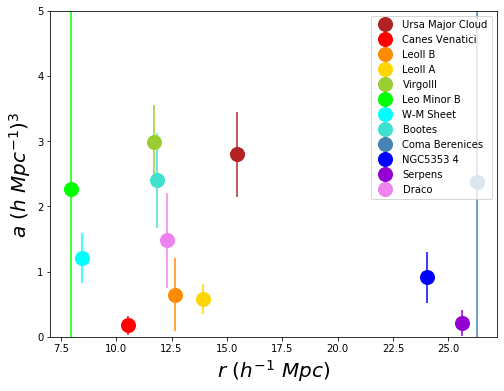

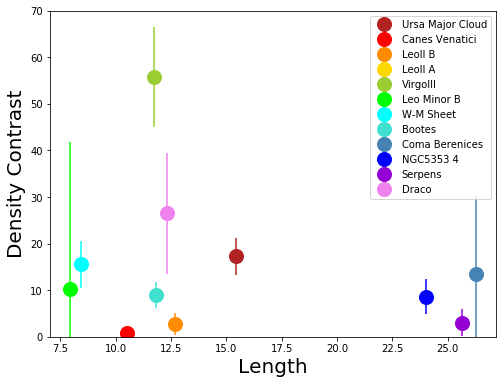

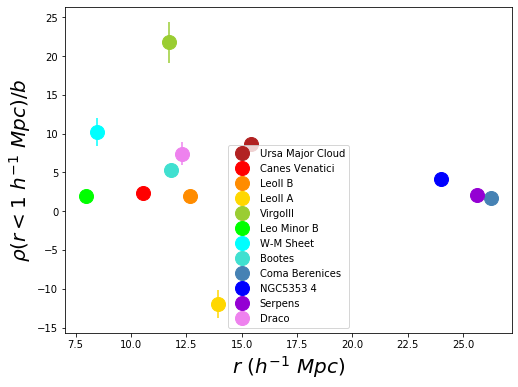

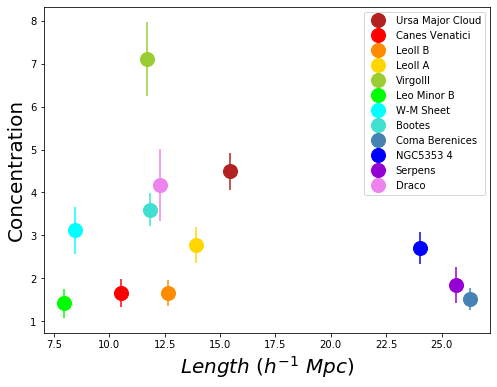

In [10]:
allfil = virgofilaments(f)
allfil.plot_scale_length_vs_length(ymax=5)
allfil.plot_central_density_vs_length(ymax=5)
allfil.plot_density_contrast_vs_length(ymax=70)
allfil.plot_central_density_contrast_vs_length()
allfil.plot_concentration_vs_length()

In [48]:
# statistics
run_spearman(alllengths,allscalelengths)
run_spearman(alllengths,allconc)
run_spearman(alllengths,alldensitycontrasts)

spearman rank test: rho=-0.41, p=0.1618
spearman rank test: rho=0.12, p=0.6940
spearman rank test: rho=-0.09, p=0.7615


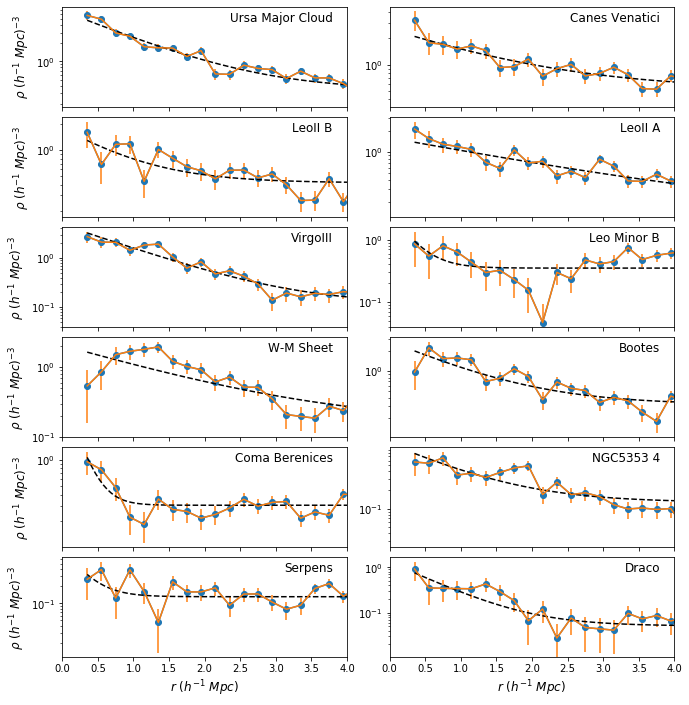

In [11]:
%matplotlib inline
os.chdir(plotdir)
%run ~/github/Virgo/programs/density-profiles.py  --stepsize 0.2

plt.savefig('filament_profiles_no_Mr_cut.png')
plt.savefig('filament_profiles_no_Mr_cut.pdf')
plt.show()

In [71]:
for f in allfilaments:
    print(f.name,f.par_best_local,f.err_par_best_local)
    

Leo Minor [2.67344657 2.01650862 0.14831537] [1.23667174 0.32428235 0.2554409 ]
Ursa Major Cloud [0.90150145 6.53585626 0.33688915] [0.0887384  0.99041045 0.02808558]
Canes Venatici [1.39965624 2.04607423 0.51598692] [0.30921491 0.43259634 0.05057604]
LeoII B [0.7615668  1.39470813 0.42004121] [0.37520966 0.90128199 0.03328887]
LeoII A [2.21331677 1.48271901 0.11564395] [0.59015456 0.21312449 0.08078188]
VirgoIII [0.87034111 4.66033136 0.11465454] [0.08040085 0.70799836 0.01666514]
Leo Minor B [0.25528449 2.36998204 0.34967882] [0.50897696 8.88776612 0.0395473 ]
W-M Sheet [1.42048761 1.89295683 0.16065634] [0.36445242 0.48635497 0.05680455]
Bootes [0.91364437 2.43847734 0.31849385] [0.21023593 0.73506256 0.03316372]
Coma Berenices [0.17799853 5.44401291 0.30501861] [0.10446161 7.55022916 0.01200917]
NGC5353 4 [0.82919447 0.99624974 0.12665612] [0.29676705 0.47155943 0.01764331]
Serpens [0.24822334 0.79013857 0.13111307] [0.30245028 1.84199225 0.00860947]
Draco [0.59501291 1.27279415 0.

## To Do


### Table 4
* add flags for HL, NSA, A100, NED
* fix Vmodel

### Table 5

* D 2D from filament
* move Nearest filament column before D 3D
* Mpc -> h^{-1} Mpc
* group cluster field -> integer

### regenerate volume density plots 

* if GL sends distance file, giving distance of each galaxy to all the filaments.

## DONE

# Color Scheme

In [22]:
from cycler import cycler
from matplotlib import cm

In [52]:
def get_cmap(n, name='tab20c'):
    
    '''
    Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.
    '''
    return plt.cm.get_cmap(name,n)


In [53]:
our_colors=[]
for i in range(13):
    our_colors.append(get_cmap(i,'tab10'))
    print(i,get_cmap(i,'tab10'))
additional_colors = [1,3,5]
for i in additional_colors:
    our_colors.append(get_cmap(i,'tab20'))

0 <matplotlib.colors.ListedColormap object at 0x7fe9af779a10>
1 <matplotlib.colors.ListedColormap object at 0x7fe9af779290>
2 <matplotlib.colors.ListedColormap object at 0x7fe9af779290>
3 <matplotlib.colors.ListedColormap object at 0x7fe9af779290>
4 <matplotlib.colors.ListedColormap object at 0x7fe9af779290>
5 <matplotlib.colors.ListedColormap object at 0x7fe9af779290>
6 <matplotlib.colors.ListedColormap object at 0x7fe9af779290>
7 <matplotlib.colors.ListedColormap object at 0x7fe9af770e50>
8 <matplotlib.colors.ListedColormap object at 0x7fe9af770e50>
9 <matplotlib.colors.ListedColormap object at 0x7fe9af770e50>
10 <matplotlib.colors.ListedColormap object at 0x7fe9af770e50>
11 <matplotlib.colors.ListedColormap object at 0x7fe9af770e50>
12 <matplotlib.colors.ListedColormap object at 0x7fe9af770e50>


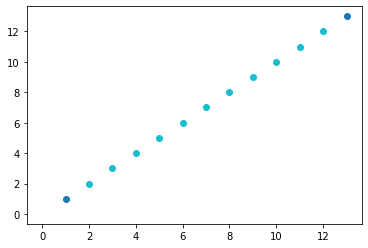

In [57]:
plt.figure()

for i,xi in enumerate(x):
    plt.plot(xi,xi,marker='o',color=our_colors[i](i))

In [35]:
t=get_cmap(1,'tab20')

In [39]:
def cmap(i):
    mycolors = ['red','cyan','black']
    return mycolors[i]

In [20]:
sum(v.main['NSAflag'] & ~v.main['NSAV0flag'])

158

In [21]:
sum(~v.main['NSAflag'] & v.main['NSAV0flag'])

122

# Hubble Diagram

In [13]:
flag = v.env['Dmedian'] > 0

Text(0.5, 1.0, 'Galaxies in the Vicinity of the Virgo Cluster')

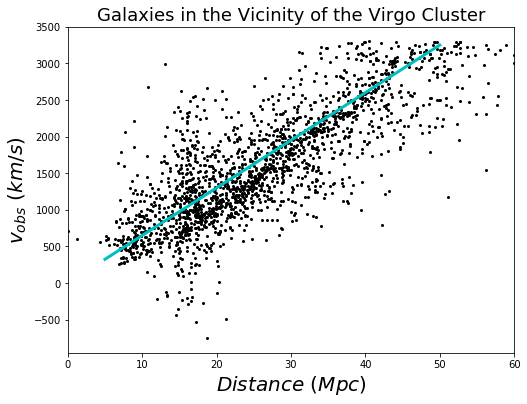

In [30]:
plt.figure(figsize=(8,6))
plt.plot(v.env['Dmedian'][flag],v.main['vr'][flag],'ko',markersize=2)
plt.ylabel('$v_{obs} \ (km/s)$',fontsize=20)
plt.xlabel('$Distance \ (Mpc)$',fontsize=20)
xline = np.linspace(5,50,100)
plt.plot(xline,65*xline,'c-',lw=3)
plt.xlim(0,60)
plt.title('Galaxies in the Vicinity of the Virgo Cluster',fontsize=18)

# Comparison with V8k

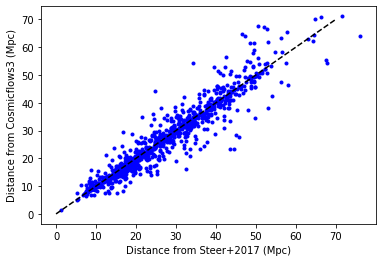

difference in distances = 0.13 +/- 3.94 Mpc
log diff in distances = 0.005 +/- 0.064 (logMpc) amd


In [5]:
os.chdir('/home/rfinn/research/Virgo/plots/')
%matplotlib inline
%run ~/github/Virgo/programs/compare-v8k-vf.py

In [6]:
# number that are matched between two catalogs
print(sum(flag2))

1006


In [7]:
!pwd

/home/rfinn/github/Virgo/notebooks
